# Jonathan Halverson
# Friday, May 13, 2016
# Clustering

In [11]:
import numpy as np
from pyspark.mllib.clustering import KMeans

In [12]:
str_lines = sc.textFile('/Users/jhalverson/data_science/machine_learning/wine.csv')
data_features = str_lines.map(lambda line: np.array([float(x) for x in line.split(',')[1:]]))
data_features.take(2)

[array([  1.42e+01,   1.71e+00,   2.43e+00,   1.56e+01,   1.27e+02,   2.80e+00,   3.06e+00,
          2.80e-01,   2.29e+00,   5.64e+00,   1.04e+00,   3.92e+00,   1.06e+03]),
 array([  1.32e+01,   1.78e+00,   2.14e+00,   1.12e+01,   1.00e+02,   2.65e+00,   2.76e+00,
          2.60e-01,   1.28e+00,   4.38e+00,   1.05e+00,   3.40e+00,   1.05e+03])]

In [13]:
from pyspark.mllib.feature import StandardScaler
stdsc = StandardScaler(withMean=True, withStd=True).fit(data_features)
data_features_std = stdsc.transform(data_features)
data_features_std.take(3)

[DenseVector([1.5143, -0.5607, 0.2314, -1.1663, 1.9085, 0.8067, 1.0319, -0.6577, 1.2214, 0.251, 0.3612, 1.8427, 1.0102]),
 DenseVector([0.2456, -0.498, -0.8257, -2.4838, 0.0181, 0.567, 0.7316, -0.8184, -0.5432, -0.2925, 0.4049, 1.1103, 0.9625]),
 DenseVector([0.1963, 0.0212, 1.1062, -0.268, 0.0881, 0.8067, 1.2121, -0.497, 2.13, 0.2683, 0.3174, 0.7864, 1.3912])]

In [14]:
from pyspark.mllib.stat import Statistics
data_features_std_stats = Statistics.colStats(data_features_std)
print 'means:', data_features_std_stats.mean()
print 'variances:', data_features_std_stats.variance()

means: [  3.50e-15  -1.11e-16   2.43e-15  -5.55e-17   9.44e-16   1.33e-15  -6.66e-16  -1.11e-16  -1.11e-16
  -1.94e-16  -6.66e-16   3.33e-16  -6.66e-16]
variances: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Below we print out the correlation matrix of the standardized features:

In [15]:
np.set_printoptions(precision=2, linewidth=100)
from pyspark.mllib.stat import Statistics
print Statistics.corr(data_features_std, method='pearson')

[[ 1.    0.09  0.21 -0.31  0.27  0.29  0.24 -0.16  0.14  0.55 -0.07  0.07  0.64]
 [ 0.09  1.    0.16  0.29 -0.05 -0.34 -0.41  0.29 -0.22  0.25 -0.56 -0.37 -0.19]
 [ 0.21  0.16  1.    0.44  0.29  0.13  0.12  0.19  0.01  0.26 -0.07  0.    0.22]
 [-0.31  0.29  0.44  1.   -0.08 -0.32 -0.35  0.36 -0.2   0.02 -0.27 -0.28 -0.44]
 [ 0.27 -0.05  0.29 -0.08  1.    0.21  0.2  -0.26  0.24  0.2   0.06  0.07  0.39]
 [ 0.29 -0.34  0.13 -0.32  0.21  1.    0.86 -0.45  0.61 -0.06  0.43  0.7   0.5 ]
 [ 0.24 -0.41  0.12 -0.35  0.2   0.86  1.   -0.54  0.65 -0.17  0.54  0.79  0.49]
 [-0.16  0.29  0.19  0.36 -0.26 -0.45 -0.54  1.   -0.37  0.14 -0.26 -0.5  -0.31]
 [ 0.14 -0.22  0.01 -0.2   0.24  0.61  0.65 -0.37  1.   -0.03  0.3   0.52  0.33]
 [ 0.55  0.25  0.26  0.02  0.2  -0.06 -0.17  0.14 -0.03  1.   -0.52 -0.43  0.32]
 [-0.07 -0.56 -0.07 -0.27  0.06  0.43  0.54 -0.26  0.3  -0.52  1.    0.57  0.24]
 [ 0.07 -0.37  0.   -0.28  0.07  0.7   0.79 -0.5   0.52 -0.43  0.57  1.    0.31]
 [ 0.64 -0.19  0.22 -0.44  0

In [16]:
def error(point, model):
    center = model.centers[clusters.predict(point)]
    return np.sqrt(sum([x**2 for x in (point - center)]))

errors =  []
k_clusters = range(1, 11)
for k in k_clusters:
    clusters = KMeans.train(data_features_std, k=k, runs=25, initializationMode="k-means||")
    WSSSE = data_features_std.map(lambda point: error(point, clusters)).reduce(lambda x, y: x + y)
    errors.append(WSSSE)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

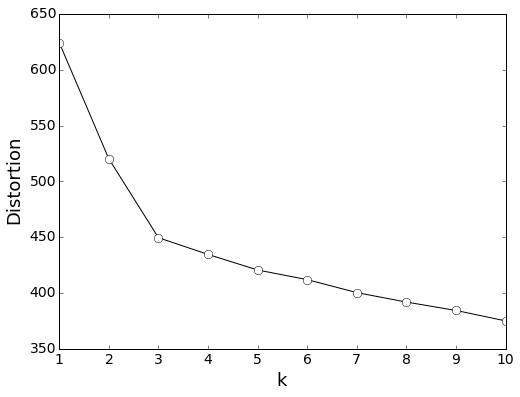

In [18]:
plt.plot(k_clusters, errors, 'k-', marker='o', mfc='w')
plt.xlabel('k')
plt.ylabel('Distortion')

Using the elbow method, we conclude that there are 3 clusters. This is confirmed by the data set.